<a href="https://colab.research.google.com/github/dutt2022/Coursera-Data-science-Projects/blob/main/a1_Concrete_Data_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
concrete_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Intro-to-KERAS/concrete_data.csv', encoding='ISO-8859-1')

In [ ]:
#sns.pairplot(concrete_df)

In [ ]:
concrete_df.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
#X = car_df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1)
X = concrete_df.drop(['Strength'], axis = 1)


In [ ]:
Y=concrete_df['Strength']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state=42)

In [ ]:

input_shape=X_train.shape[1]

In [ ]:
X_train.shape[0]

721

In [ ]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.preprocessing import MinMaxScaler
def regression_model():
  model = Sequential()
  model.add(Dense(10,  activation='relu',input_dim=8,input_shape=(X_train.shape[1],)))

  model.add(Dense(1, kernel_initializer='normal'))
  model.compile(optimizer='adam', loss='mean_squared_error',metrics='mse')
  return model
  model.summary()


In [ ]:
model = regression_model()

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs=50,  verbose=2, validation_split=0.3)

Epoch 1/50
16/16 - 1s - loss: 1263.1049 - mse: 1263.1049 - val_loss: 650.8125 - val_mse: 650.8125 - 842ms/epoch - 53ms/step
Epoch 2/50
16/16 - 0s - loss: 552.7176 - mse: 552.7176 - val_loss: 329.3134 - val_mse: 329.3134 - 67ms/epoch - 4ms/step
Epoch 3/50
16/16 - 0s - loss: 391.1316 - mse: 391.1316 - val_loss: 299.4072 - val_mse: 299.4072 - 44ms/epoch - 3ms/step
Epoch 4/50
16/16 - 0s - loss: 365.2391 - mse: 365.2391 - val_loss: 285.0819 - val_mse: 285.0819 - 43ms/epoch - 3ms/step
Epoch 5/50
16/16 - 0s - loss: 344.8996 - mse: 344.8996 - val_loss: 266.3158 - val_mse: 266.3158 - 60ms/epoch - 4ms/step
Epoch 6/50
16/16 - 0s - loss: 331.5428 - mse: 331.5428 - val_loss: 250.3799 - val_mse: 250.3799 - 60ms/epoch - 4ms/step
Epoch 7/50
16/16 - 0s - loss: 314.0995 - mse: 314.0995 - val_loss: 236.4939 - val_mse: 236.4939 - 54ms/epoch - 3ms/step
Epoch 8/50
16/16 - 0s - loss: 300.1835 - mse: 300.1835 - val_loss: 227.0394 - val_mse: 227.0394 - 73ms/epoch - 5ms/step
Epoch 9/50
16/16 - 0s - loss: 290.52

In [ ]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


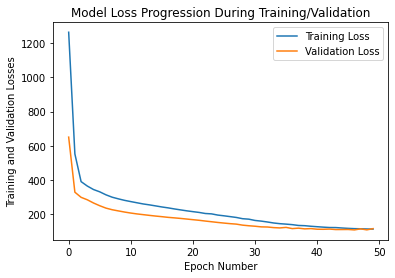

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

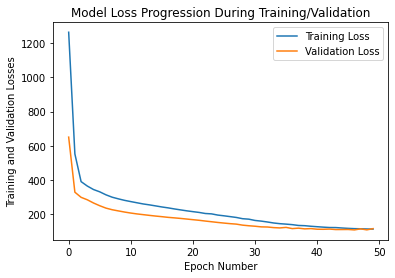

In [ ]:
plt.plot(epochs_hist.history['mse'])
plt.plot(epochs_hist.history['val_mse'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from keras.losses import mean_squared_error

In [ ]:
result = np.sqrt(mean_squared_error(y_test,y_pred))
result

array([27.788502, 23.847094, 31.182434, 23.525913, 20.60682 , 18.357216,
       17.158796, 17.66822 , 18.015558, 18.85129 , 16.999907, 20.514841,
       34.09092 , 25.533012, 17.281807, 19.658037, 16.727133, 16.697475,
       17.068014, 16.640997, 17.011078, 17.121475, 16.963215, 17.435993,
       16.635096, 16.637978, 25.322647, 18.42454 , 17.59466 , 17.91473 ,
       16.715414, 16.607708, 20.73349 , 18.107916, 16.857988, 16.814026,
       18.203125, 17.826082, 20.93398 , 17.42094 , 19.584639, 22.445284,
       16.56826 , 22.584301, 19.427523, 28.633156, 24.308544, 27.860935,
       18.725618, 20.400032, 19.063238, 17.058064, 16.831038, 16.464   ,
       23.136028, 24.033304, 18.707226, 22.434223, 17.409761, 21.573503,
       17.75261 , 18.137688, 16.456377, 25.812178, 17.949621, 19.387365,
       16.544384, 22.620852, 17.395191, 17.433138, 20.707006, 20.39829 ,
       23.692026, 17.01004 , 17.172686, 20.563868, 28.019485, 17.84006 ,
       32.784634, 20.081186, 18.199512, 20.929218, 

In [ ]:
from keras.losses import mean_squared_error

Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors

In [ ]:
MSE_List = []
for i in range(50):
    #1-Split Data:
     X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
     model = regression_model()
    #2-Train:
     model.fit(X_train, y_train, epochs=50, verbose=0)
    
    #Prediction:
     y_pred = model.predict(X_test)
    # y_pred = np.argmax(model.predict(X_test),axis=-1)
    # y_test=np.argmax(y_test)
    #3-Evaluate_Model:
     result = np.sqrt(mean_squared_error(y_test,y_pred))
    
     print("{}: sqrt(mse) = {}". format(i+1,result))
     MSE_List.append(result)
     print("***_________________________________***\n\n\n")

1: sqrt(mse) = [35.76174  18.246613 20.328823 18.089863 19.398882 16.577974 17.252293
 16.449232 18.668417 18.559938 16.641693 18.073797 20.79587  19.480947
 19.185896 17.344912 16.474195 16.45559  16.643559 17.689095 16.68606
 17.48695  16.44933  16.648018 18.117937 17.545732 19.083868 17.001955
 16.509975 16.715939 16.601711 16.698147 19.466787 16.457819 18.014406
 17.947645 18.77224  16.485825 18.001177 16.450224 17.579983 18.730606
 16.525698 17.047575 18.675251 21.187952 17.065119 32.545452 16.698212
 17.540545 17.685287 17.269455 16.463593 16.480988 19.773363 18.49828
 19.313168 19.027462 18.089478 18.101896 16.480997 16.81429  16.449522
 18.468683 16.608374 19.514437 16.449581 20.353922 16.816452 17.687283
 17.637127 17.19956  18.48526  16.6439   17.66465  19.056158 36.472702
 16.452345 22.926426 17.73382  18.748995 17.319645 17.073124 16.819838
 39.65348  18.089863 17.070423 16.478712 19.153454 18.21642  16.52204
 20.970377 20.891418 18.40817  17.293272 27.262438 19.545279 17.0

A. Results
Report mean square MSE and std square MSE

In [ ]:
# Calculate the mean and the standard deviation of the metric on the 50 samplings
mean_sqmse_A = np.mean(MSE_List)
std_sqmse_A  = np.std(MSE_List)

# Generate a data frame to store the results of the differents parts of this project
df_results = pd.DataFrame.from_dict({"Part": ["A"],"mean_sq_mse": [mean_sqmse_A], "std_sq_mse": [std_sqmse_A]})
df_results

,Part,mean_sq_mse,std_sq_mse
0,A,20.041121,4.073147


PART-A-EPOCHS-50(NON-NORMALIZED)


In [ ]:
df_results = pd.DataFrame.from_dict({"Part": ["EPOCHS-50(NON-NORMALIZED)"],"mean_sq_mse": [mean_sqmse_A], "std_sq_mse": [std_sqmse_A]})
df_results

,Part,mean_sq_mse,std_sq_mse
0,EPOCHS-50(NON-NORMALIZED),20.041121,4.073147
